In [95]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"
ans_path = "./data/ans.csv"

In [96]:
train_raw = pd.read_csv(train_path, sep=',', encoding='big5')
test_data = pd.read_csv(test_path, sep=',', encoding='big5', names=['id','index','1','2','3','4','5','6','7','8','9'])

In [97]:
train_1 = train_raw.iloc[:, 3:3+10]
train_2 = train_raw.iloc[:, 16:16+10]
attr_index = train_raw.iloc[:, 2]

In [98]:
train_1 = pd.concat([train_1, attr_index], axis=1)
train_2 = pd.concat([train_2, attr_index], axis=1)

In [99]:
y_1 = train_1[train_1["測項"] == "PM2.5"]
y_1 = y_1['9'].values
y_2 = train_2[train_2["測項"] == "PM2.5"]
y_2 = y_2['22'].values
Y = np.concatenate((y_1, y_2), axis=0)
Y = Y.astype('float64')
Y = Y[:,np.newaxis]
del y_1, y_2

In [100]:
x_1 = train_1.iloc[:,0:9]
x_2 = train_2.iloc[:,0:9]
x_1.replace('NR',0,inplace=True)
x_2.replace('NR',0,inplace=True)

/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [101]:
x_1 = x_1.values.reshape((240, -1))
x_2 = x_2.values.reshape((240, -1))
X_raw = np.concatenate((x_1, x_2), axis=0)
X_raw = X_raw.astype('float64')

In [102]:
tmp = np.ones(Y.shape)
X = np.c_[tmp, X_raw]
del tmp

In [103]:
test_data.replace('NR',0,inplace=True)

In [104]:
x_test = test_data.iloc[:, 2:].values.reshape((240, -1)).astype('float64')

In [105]:
tmp = np.ones(x_test.shape[0])
x_test = np.c_[tmp, x_test]
del tmp

In [106]:
def training(x, y, w, iteration=1000, alpha=1e-3, eps=1e-3):
    total = len(y)
    # gradient descent
    rmse = []
    for i in range(iteration):
        y_pre = np.dot(x,w)
        loss = y_pre - y
        w_new = w - alpha / total * np.dot(x.T, loss)
        rmse.append((np.sqrt(np.dot(loss.T, loss) / total)).item())
        if(np.max(np.abs(w_new - w)) < eps):
            break
        w = w_new
    return rmse, w

In [107]:
w = np.zeros((X.shape[1], 1))

In [108]:
rmse, w_end = training(X, Y, w, iteration=6000, alpha=3e-6, eps=1e-10)

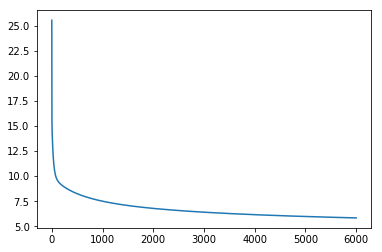

In [109]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(range(len(rmse)), rmse)
plt.show()

In [110]:
y_test_pre = np.dot(x_test, w_end)

In [111]:
y_test = pd.read_csv(ans_path, sep=',')

In [112]:
y_test = y_test['value'].values.astype('float64')
y_test = y_test[:, np.newaxis]

In [113]:
rmse_end = np.sqrt(((y_test - y_test_pre)**2).sum() / len(y_test))
rmse_end

8.273641912369452